multi-scale分为multi-scale training与multi-scale testing，二者都是在spp论文中被提出。

multi-scale train一种方式是每隔一个epoch或若干iteration就变换一个输入图像的scale，以此来增强模型对于图像尺寸的鲁棒性,yolov2就采用这种方式。

multi-scale train另一种方式（该方式同样适用于multi-scale testing）在论文"Object Detection Networks on Convolutional Feature Maps"（见pbject detection/NoC）中被提出，如下图所示，两个不同尺度的特征图投影出两个不同尺寸的特征子图，随后两个特征子图分别送入roi pooling与后续层，然后两个处理后的特征子图通过maxout(见object detection/maxou)合并。
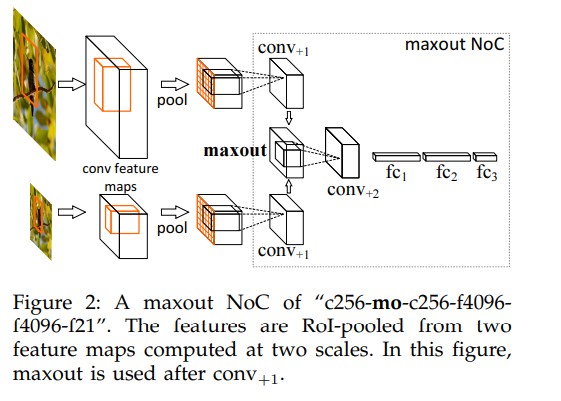

multi-scale testing: spp中用到的多尺度测试是由图像金字塔（文中用[480, 576, 688, 864, 1200]）经过基础网络得到多个不同尺寸的特征图，然后对于每一个候选区域（候选区域是由ss算法在原图上生成），选择一个尺寸的图像，在该尺寸的图像中，该候选区域的像素值最接近224x224，然后就用这个尺寸的图像产生的特征图进行投影，并进行后续操作。

NoC中采用的方法是对于每一个候选区域，随机选用两个相邻尺寸图像，分别将该候选区域投影到两个特征图，然后经过roi pooling等操作，最后用maxout连接，resnet对于faster RCNN的改进亦是如此，只是候选框的产生是RPN产生的（RPN只产生一次候选区域，用600的尺寸，然后投影到两个相邻尺寸的特征图）